<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático No Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiqutados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [27]:
import numpy as np
import pandas as pd

import mlflow.sklearn

# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from ml.visualization import plot_confusion_matrix, plot_learning_curve
import datetime
import mlflow
np.random.seed(0)  # Para mayor determinismo
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.cluster import KMeans

In [4]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático No Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.

#### 3. Análisis del Balance de Clases

En una primera instancia, podemos dejar que los algoritmos identifiquen patrones, sin necesidad de preocuparnos por el balance de clases.

En una etapa posterior, y aprovechando que tenemos las etiquetas, aplicarán los mismos algoritmos pero considerando el desbalance de clases en el dataset. Para ello, usar el parámetro `sample_weight` de `k_means`. Obtener conclusiones entre ambos resultados.

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría. ¿Qué creen que ocurrirá con estas variables al aplicar PCA?

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para ambos conjuntos de datos**. Posteriormente, podremos determinar cuál es el más apropiado para aplicar las técnicas de clasificación no supervisada.

#### 6. Creación de Nuevos Atributos

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, una variable que represente los aparatos tecnológicos, la tasa de dependencia al cuadrado, años de escolaridad al cuadrado, tasa de dependencia por edad de la persona jefa de hogar o por la edad promedio del hogar, el logaritmo natural de la tasa de dependencia, entre otras.

#### 7. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 8. Mezca Aleatória y División en Train/Test

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.

Respecto a la división en Train/Test, dado que se trata de un algoritmo de aprendizaje automático no supervisado, pueden omitir esta división, ya que estamos buscando patrones ocultos en los datos que reflejen las causas latentes.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, una técnica de clusterización.

#### 1. Descomposivión de Variables: Principal Component Analysis

Si bien la mayoría de nuestros atributos se tratan de variables binarias y PCA no es tan apropiado para este tipo de datasets, puede aplicarse esta técnica y ver que resulta.
A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

Adicionalmente, existe una técnica llamada Factor Analysis que puede ser más apropiada para este caso. Aplicarla y obtener conclusiones. Comparar con los resultados obtenidos previamente.

#### 2. K-Means Clustering

Aplicar K-Means tanto a los dataset originales como a los datasets transformados a partir de cualquiera de las técnicas anteriores.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

- Calcular las métricas pertinentes sobre los clusters resultantes.
- Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
- Agregar a los dataset originales el cluster resultante de los modelos.
- Graficar diferentes variables de interés por cluster y por clase, y compararlos.
- Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.
- Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.
- Contrastar la clasificación en clusters con las etiquetas de clases, tanto gráficamente como analítica. Si utilizan 4 clusters, elaborar una matriz de confusión.

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán agregar al PPT la síntesis de las principales conclusiones de éste práctico.

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [5]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields.head(5)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [8]:
#import importlib
#importlib.reload(clean)
import clean

clean_ds = clean.clean(_ds)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Columnas eliminadas: edjefe, edjefa, dependency, meaneduc, rez_esc, hhsize, r4t1, r4t2, r4t3,r4m3, r4h3, hogar_total
Cantidad de familias sin caracteristicas comunes:  19
Cantidad de familias sin caracteristicas comunes:  4


D:\Diplo\workspace\DiploDatos2019\ProyectoPobrezaCostaRica\clean.py:154: FutureWarning: `item` has been deprecated and will be removed in a future version
  x['edu_jefe'] = (_ds.loc[(_ds['parentesco1']==1) & (_ds['idhogar']==x['idhogar']), 'escolari'].item())**2


New synthetic features: tech_individuo, tech_hogar, monthly_rent_log,             bedrooms_to_rooms, edu_jefe, rent_to_rooms, SQBage, SQBhogar_total, child_dependency,            rooms_per_person, rooms_per_person, female_weight, male_weight. 
Total Features:  2 objetos + 132 numerical = 134 features


### 3.Preparacion de datos

Esta etapa incluye  Análisis de Balance de Clases, Multicolinealidad Exacta y Variables Dummies, Clasificación a Nivel Hogar o a Nivel Individuo, Normalización de Atributos y Mezca Aleatória y División en Train/Test

Evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

In [9]:
clean_ds.head()

,Id,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,Target,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight,edu_jefe
0,ID_279628684,190000.000000,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,1,1.0,12.154779,0.333333,63333.333333,1849,1,0.0,0.333333,0.00,1.00,100
1,ID_f29eb3ddd,135000.000000,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,4,4.0,11.813030,0.250000,33750.000000,4489,4,0.0,0.500000,0.00,1.00,144
2,ID_68de51c94,328862.222222,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,0,0.0,12.703394,0.250000,41107.777778,8464,4,0.0,0.250000,1.00,0.00,121
3,ID_d671db89c,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,4,16.0,12.100712,0.600000,36000.000000,289,16,0.5,0.800000,0.25,0.25,121
4,ID_d56d6f5f5,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,4,16.0,12.100712,0.600000,36000.000000,1369,16,0.5,0.800000,0.25,0.25,121


In [10]:
import importlib
importlib.reload(clean)

new_df, columns = clean.prepare_data(clean_ds)


#X_train, y_train = clean.create_random_oversample(X_train, y_train)


#X_train, y_train = clean.create_smote_oversample(X_train, y_train)


X_train, y_train = clean.create_adasyn_oversample(new_df.drop(['Target'], axis=1), new_df['Target'])


Preparing data...
Drop multicollinearity
Normalize
Creating ADASYN Oversampling
[(1, 6067), (2, 5576), (3, 5872), (4, 5953)]


## II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Utilizando los datos obtenidos, se aplicarán técnicas de reducción de dimensionalidad y el modelo K-Means de Clustering, tanto a `_ds_individuo` como a `_ds_hogar`.

### 1. Descomposivión de Variables: Principal Component Analysis

A continuación se aplicará la técnica de descomposición por Análisis de Componente Principal (PCA).

In [89]:
# Utilizar diferentes valores para el parámetro n_components
from sklearn.decomposition import PCA
pca = PCA(random_state=42,n_components=100)
pca_ind = pca.fit(X_train)
#pca_hog = pca.fit(_ds_hogar)

In [90]:
# Utilizar pca.components_ para analizar las causas latentes
#let's check the shape of X_pca array
X_pca=pca.transform(X_train) 
print("shape of X_pca", X_pca.shape)


shape of X_pca (23835, 100)


c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


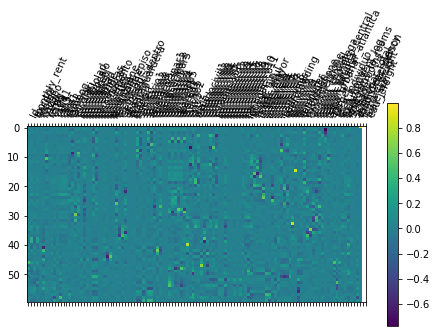

In [61]:
plt.matshow(pca.components_,cmap='viridis')

plt.colorbar()
plt.xticks(range(len(new_df.columns)),new_df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [145]:
X_pca

array([[ 3.67881994e+01, -3.00117366e-01, -1.04857782e-01, ...,
        -2.83935330e-02, -1.63301190e-02, -5.89951607e-03],
       [ 8.07894620e+01,  1.70741848e-01,  6.23797019e-02, ...,
        -8.25118921e-04, -5.21102858e-03,  8.28292428e-03],
       [ 5.77871227e+01, -7.66125983e-01, -6.09907482e-01, ...,
         3.22178849e-02, -9.40757879e-02,  1.59554827e-02],
       ...,
       [-4.72239887e+01,  1.16086245e+00, -1.02269189e+00, ...,
         1.75337039e-02, -3.86516491e-02, -9.41237784e-03],
       [-4.72242062e+01,  1.21948154e+00, -1.22751381e+00, ...,
         5.70586012e-03, -2.48613019e-02, -1.51666234e-02],
       [-4.72156977e+01,  8.21773315e-02, -7.73692568e-01, ...,
        -6.72153551e-03, -1.40005721e-02, -9.49468589e-03]])

#### Factor Analysis

Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Assumptions:

- There are no outliers in data.
- Sample size should be greater than the factor.
- There should not be perfect multicollinearity.
- There should not be homoscedasticity between the variables.

In [172]:
clean_ds.drop(['Id', 'idhogar','Target'], axis=1, inplace=True)

##### Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

###### Bartlett’s Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [175]:
clean_ds.head()

,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight,edu_jefe
0,190000.000000,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,1,1.0,12.154779,0.333333,63333.333333,1849,1,0.0,0.333333,0.00,1.00,100
1,135000.000000,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,4.0,11.813030,0.250000,33750.000000,4489,4,0.0,0.500000,0.00,1.00,144
2,328862.222222,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,0,0.0,12.703394,0.250000,41107.777778,8464,4,0.0,0.250000,1.00,0.00,121
3,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,16.0,12.100712,0.600000,36000.000000,289,16,0.5,0.800000,0.25,0.25,121
4,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,16.0,12.100712,0.600000,36000.000000,1369,16,0.5,0.800000,0.25,0.25,121


In [176]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(clean_ds)
#chi_square_value, p_value = calculate_bartlett_sphericity(X_train)

chi_square_value, p_value



(nan, nan)

###### Kaiser-Meyer-Olkin (KMO) Test 
Measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.



In [149]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
kmo_all,kmo_model=calculate_kmo(new_df.drop(['Id','idhogar'], axis=1))
kmo_model

nan

##### Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [ ]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer()
fa.fit(new_df.drop(['Id','idhogar'], axis=1))
# Check Eigenvalues
#fa.loadings_


In [ ]:

fa = FactorAnalysis(n_components=7, random_state=0)
fa_ind = fa.fit_transform(_ds_individuo)
fa_hog = fa.fit_transform(_ds_hogar)

Si se animan, pueden usar una red neuronal como encoder para la reducción de dimensionalidad.

***Hint: *** [En el siguiente link](https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b)

### 2.  K-Means Clustering

In [68]:
X = new_df.drop(['Id','idhogar'], axis=1).select_dtypes(exclude=['float64'])[4000:].values
X.shape

(5494, 84)

A continuación se aplicará K-Means para clasificar en clusters nuestros datasets.

For n_clusters = 2 The average silhouette_score is : 0.1354272505832062
For n_clusters = 3 The average silhouette_score is : 0.09107743043354027
For n_clusters = 4 The average silhouette_score is : 0.06603658219483477
For n_clusters = 5 The average silhouette_score is : 0.062028722983938495
For n_clusters = 6 The average silhouette_score is : 0.06505237102322295


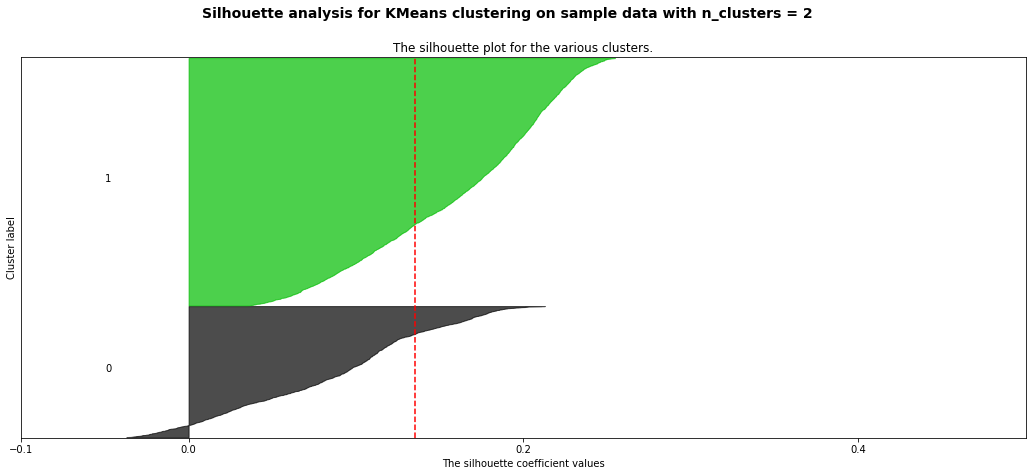

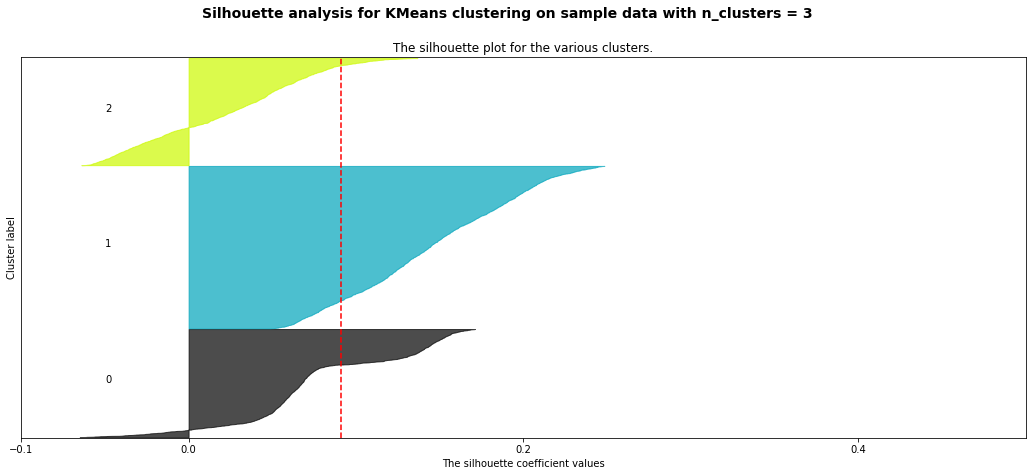

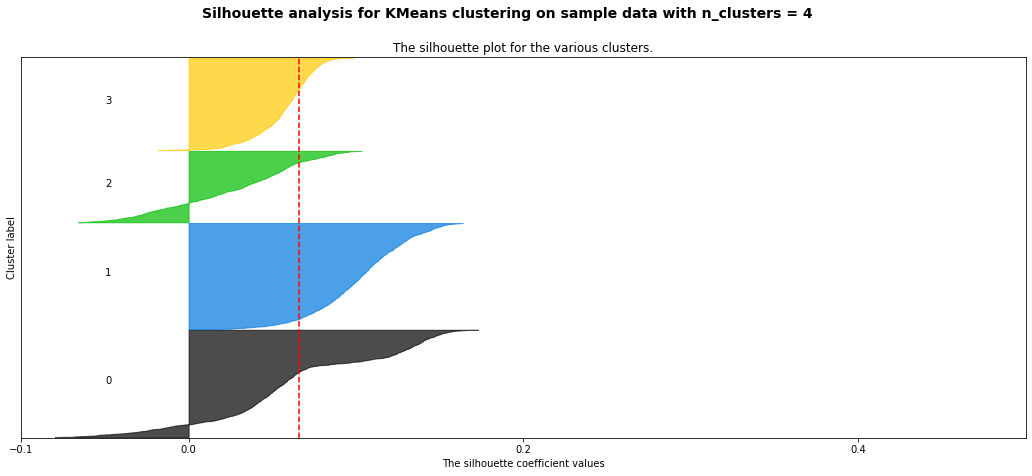

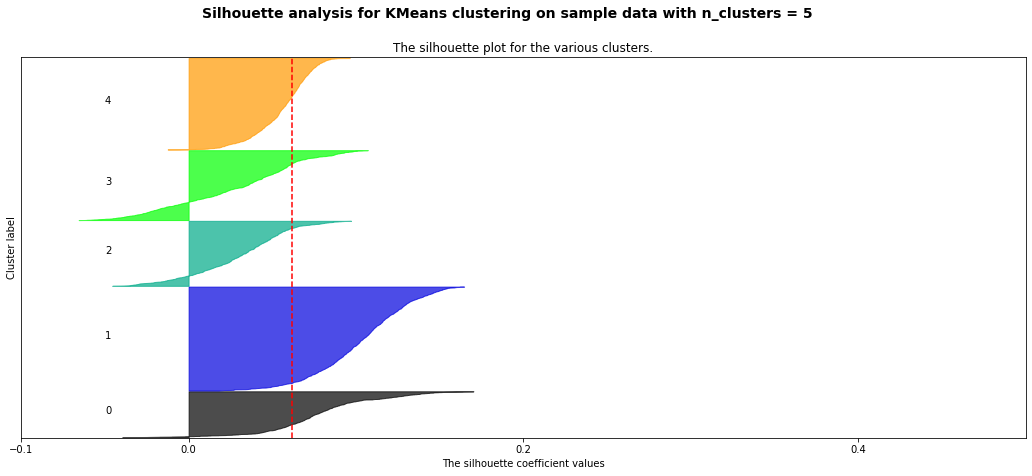

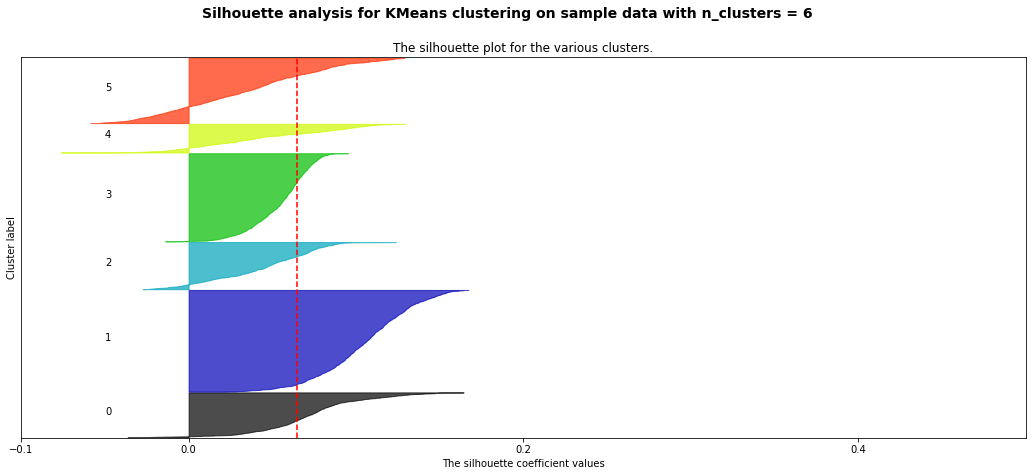

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
#X = new_df.drop(['Id','idhogar'], axis=1).select_dtypes(exclude=['float64'])[4000:].values


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0.5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [70]:

num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X_pca)

clusters = km.labels_.tolist()

NameError: name 'X_pca' is not defined

El cluster 0 tiene 2935 elementos 

El cluster 1 tiene 9221 elementos 

El cluster 2 tiene 287 elementos 

El cluster 3 tiene 5148 elementos 



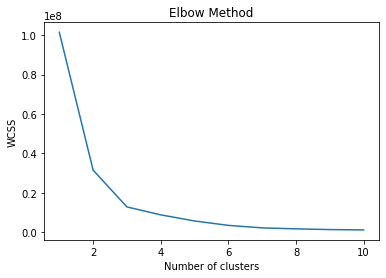

In [95]:
# Recuento del número de elementos en cada cluster

    
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

clusters = kmeans.labels_.tolist()  
for i in range(num_clusters):
    print ('El cluster %i tiene %i elementos \n' % (i, clusters.count(i)))

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
# Agrupar por clusters y clases los datasets, utilizando .count()
X_pca['cluster'] = clusters
X_pca['cluster'].value_counts()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:
# Calcular estadísticos relevantes para variables clave del dataset, diferenciados por cada cluster
# Pueden usar .describe()

In [69]:
# Para encontrar los centroides y analizarlos pueden utilizar lo siguiente:
centroids = km.cluster_centers_   # centroids = km.centroids
order_centroids = centroids.argsort()[:, ::-1]

In [72]:
# Aplicar método de Elbow para identificar el número de clusters óptimo
n = 4
sum_sq_dist = []
list_k = list(range(1, n))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sum_sq_dist.append(km.inertia_)

In [76]:
# Calcular la métrica de la silueta. Pueden usar los módulos silhouette_samples y silhouette_score
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X_pca, clusters)

MemoryError: Unable to allocate array with shape (9494, 9494) and data type float64

Graficar diferentes variables de interés por cluster y por clase, y compararlos.

En caso de que hayan dividido en Train/Test los datasets y utilizado la misma cantidad de clusters que de clases en las etiquetas originales, pueden calcular las métricas convencionales. Graficar clusters versus clases originales.

In [157]:
df= pd.read_csv("bfi.csv")

In [158]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [159]:
df.dropna(inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
Unnamed: 0    2436 non-null int64
A1            2436 non-null float64
A2            2436 non-null float64
A3            2436 non-null float64
A4            2436 non-null float64
A5            2436 non-null float64
C1            2436 non-null float64
C2            2436 non-null float64
C3            2436 non-null float64
C4            2436 non-null float64
C5            2436 non-null float64
E1            2436 non-null float64
E2            2436 non-null float64
E3            2436 non-null float64
E4            2436 non-null float64
E5            2436 non-null float64
N1            2436 non-null float64
N2            2436 non-null float64
N3            2436 non-null float64
N4            2436 non-null float64
N5            2436 non-null float64
O1            2436 non-null float64
O2            2436 non-null int64
O3            2436 non-null float64
O4            2436 non-null float

In [161]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.19955392496, 0.0)